# Telco Churn Analysis

Sample Data Set containing Telco customer data and showing customers left last month

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

#Load the data file

In [2]:
#Load the data file
telco_base_data = pd.read_csv('TelecomCustomer.csv')

**Look at the top 5 records of data**

In [5]:
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [4]:
telco_base_data.shape

(7043, 21)

In [5]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
# Checking the data types of all the columns
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Check the descriptive statistics of numeric variables
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

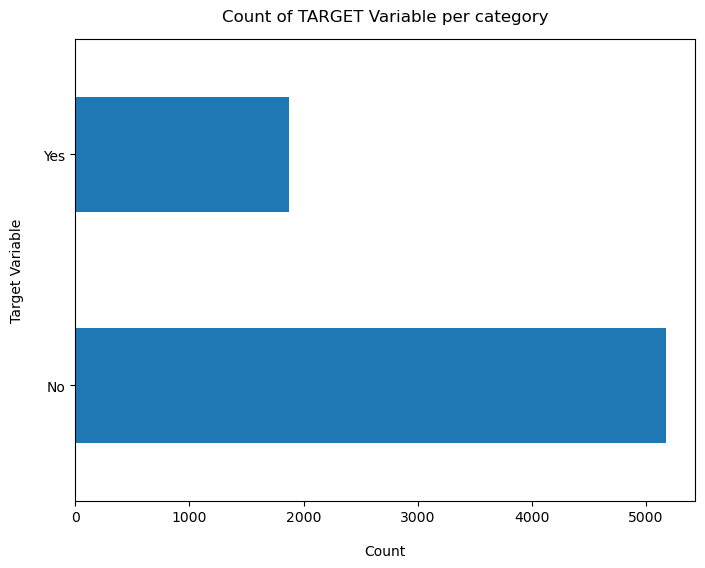

In [8]:
telco_base_data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [9]:
100*telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [10]:
telco_base_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

* Data is highly imbalanced, ratio = 73:27<br>
* So we analyse the data with other features while taking the target values separately to get some insights.

In [11]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
telco_base_data.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
#check Missing Value 
telco_base_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Here, we don't have any missing data

## Data Cleaning


**1.** Create a copy of base data for manupulation & processing

In [13]:
telco_data = telco_base_data.copy()

**2.** Total Charges should be numeric amount. Let's convert it to numerical data type

In [14]:
 vctelco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**3.** As we can see there are 11 missing values in TotalCharges column. Let's check these records 

In [15]:
telco_data.loc[telco_data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**4. Missing Value Treatement**

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [16]:
#Removing missing values 
telco_data.dropna(how = 'any', inplace = True)
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**5.** Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [17]:
# Get the max tenure
print(telco_data['tenure'].max()) #72

72


In [18]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [19]:
telco_data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

**6.** Remove columns not required for processing

In [20]:
#drop column customerID and tenure
telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Data Exploration
**1. ** Plot distibution of individual predictors by churn

### Univariate Analysis

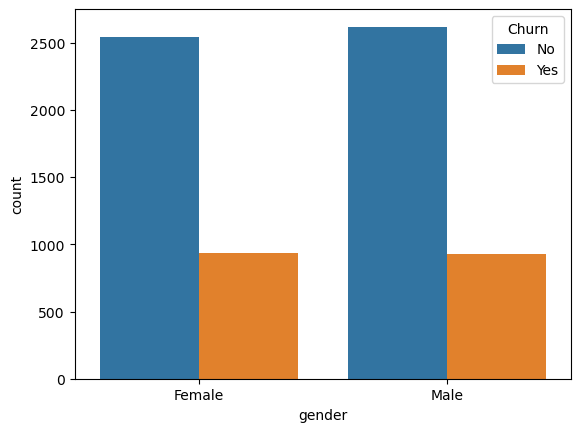

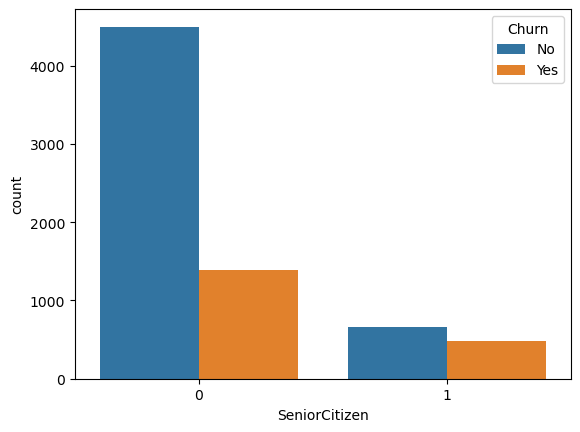

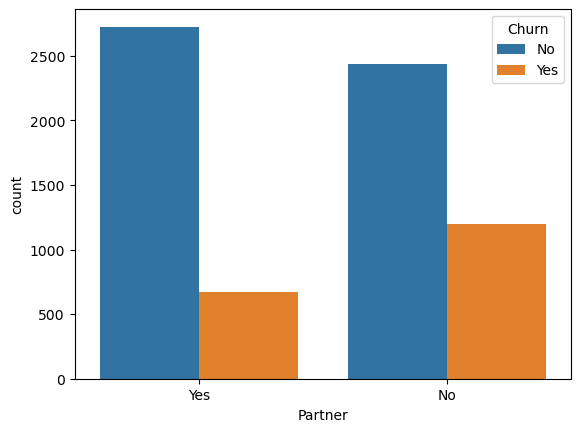

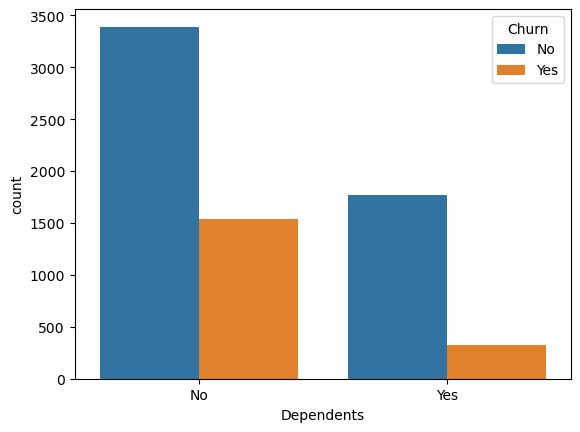

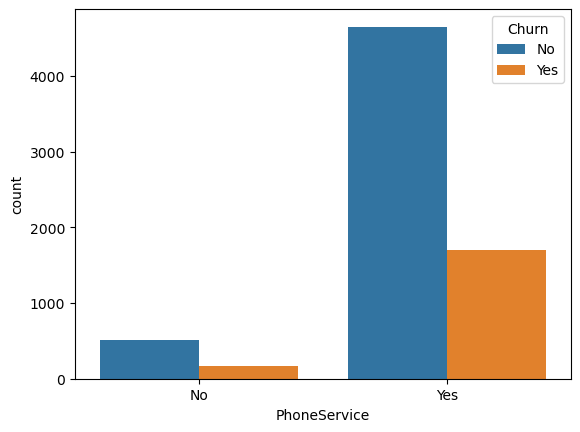

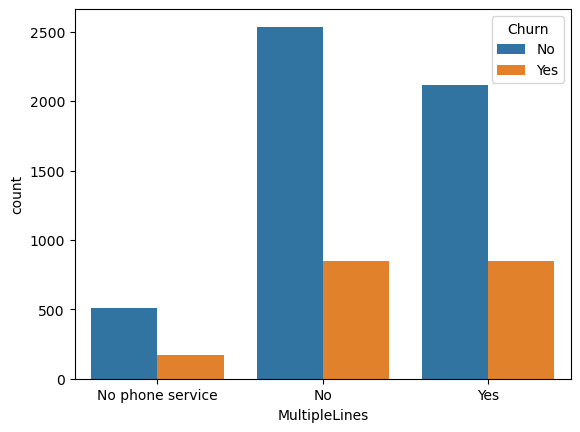

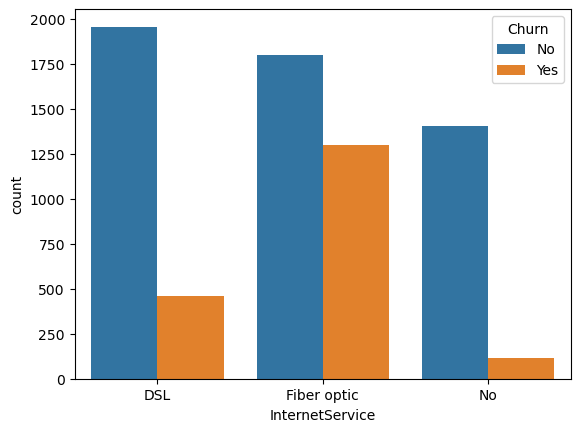

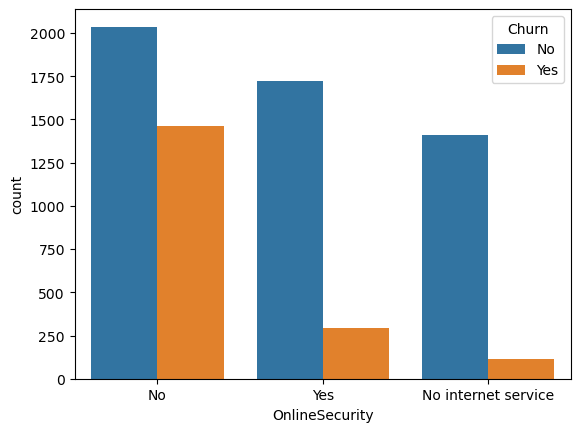

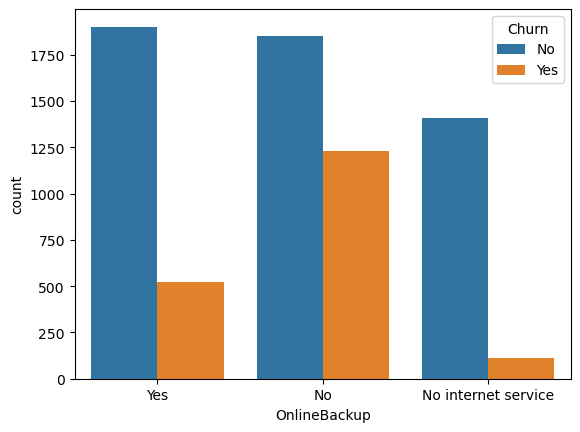

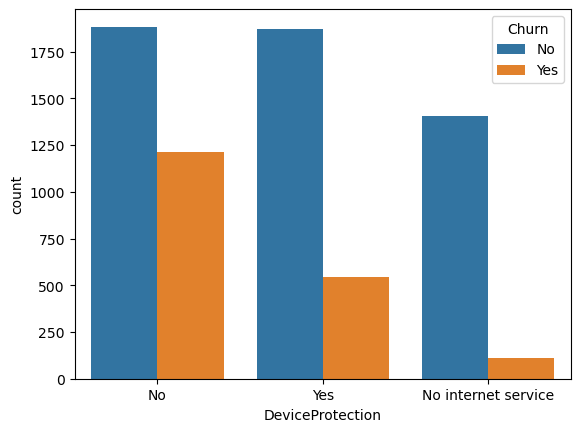

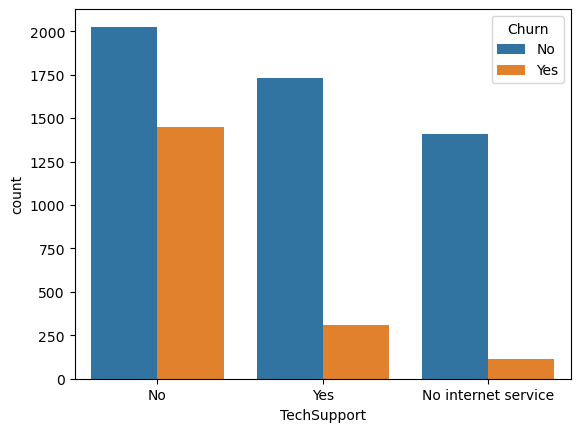

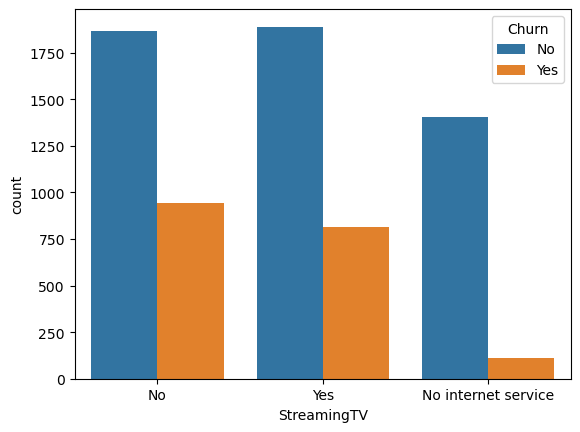

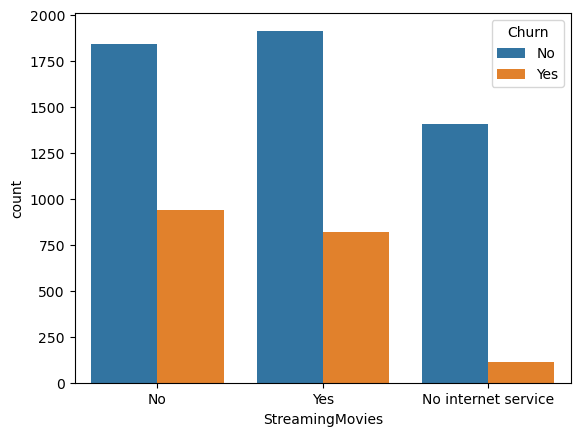

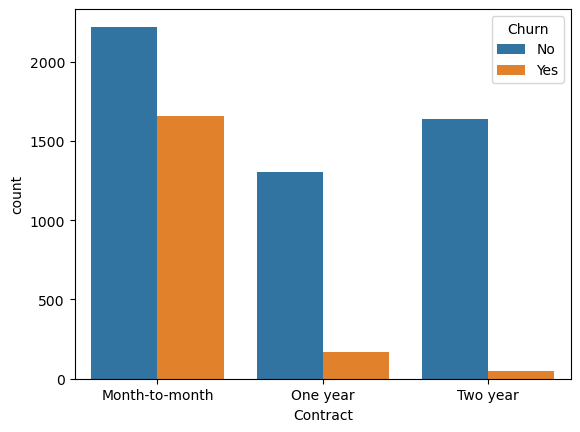

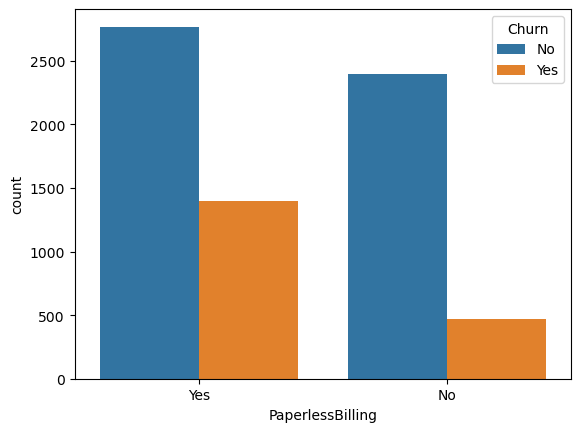

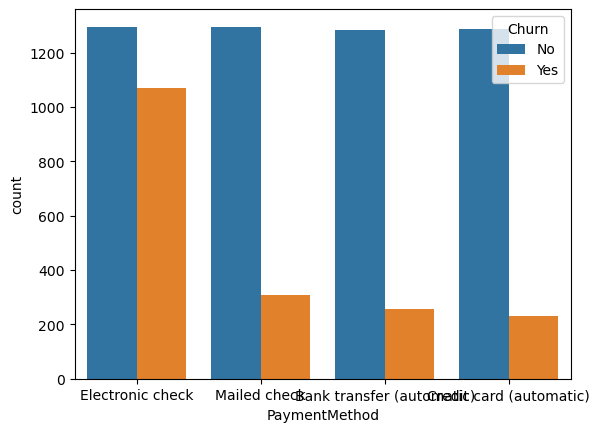

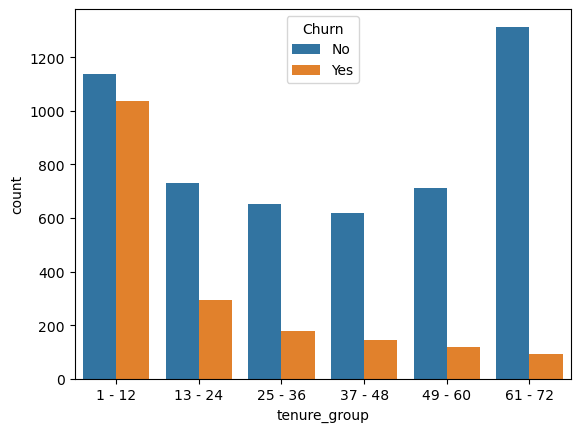

In [21]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

**2.** Convert the target variable 'Churn'  in a binary numeric variable i.e. Yes=1 ; No = 0

In [22]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [23]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


**3.** Convert all the categorical variables into dummy variables

In [24]:
telco_data_dummies = pd.get_dummies(telco_data,drop_first=True)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1,0,56.95,1889.50,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,53.85,108.15,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0


**9. ** Relationship between Monthly Charges and Total Charges

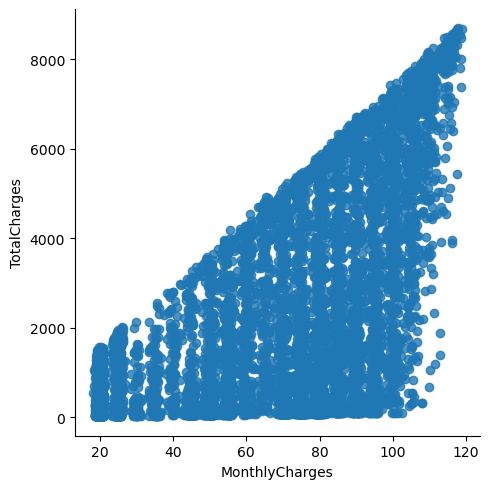

In [25]:
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

Total Charges increase as Monthly Charges increase - as expected.

**10. ** Churn by Monthly Charges and Total Charges

C:\Users\sbuch\AppData\Local\Temp\ipykernel_27068\722082952.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
C:\Users\sbuch\AppData\Local\Temp\ipykernel_27068\722082952.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

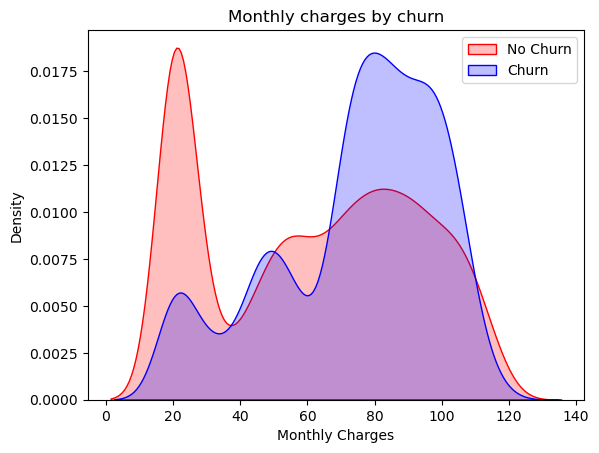

In [26]:
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

**Insight:** Churn is high when Monthly Charges ar high

C:\Users\sbuch\AppData\Local\Temp\ipykernel_27068\4019118049.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
C:\Users\sbuch\AppData\Local\Temp\ipykernel_27068\4019118049.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

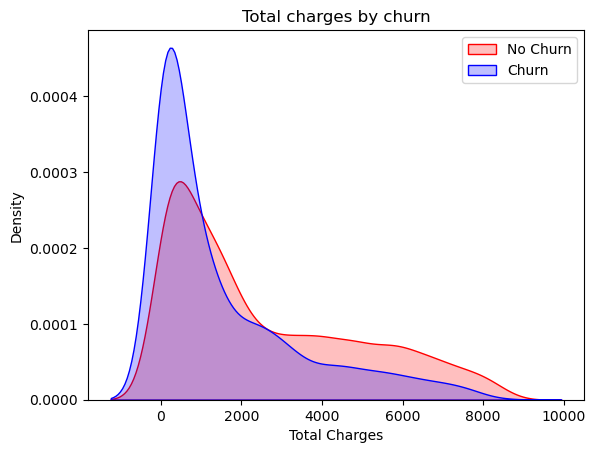

In [27]:
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

**Surprising insight ** as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz **Higher Monthly Charge**,  **Lower tenure** and **Lower Total Charge** are linkd to **High Churn**.

**11. Build a corelation of all predictors with 'Churn' **

<Axes: >

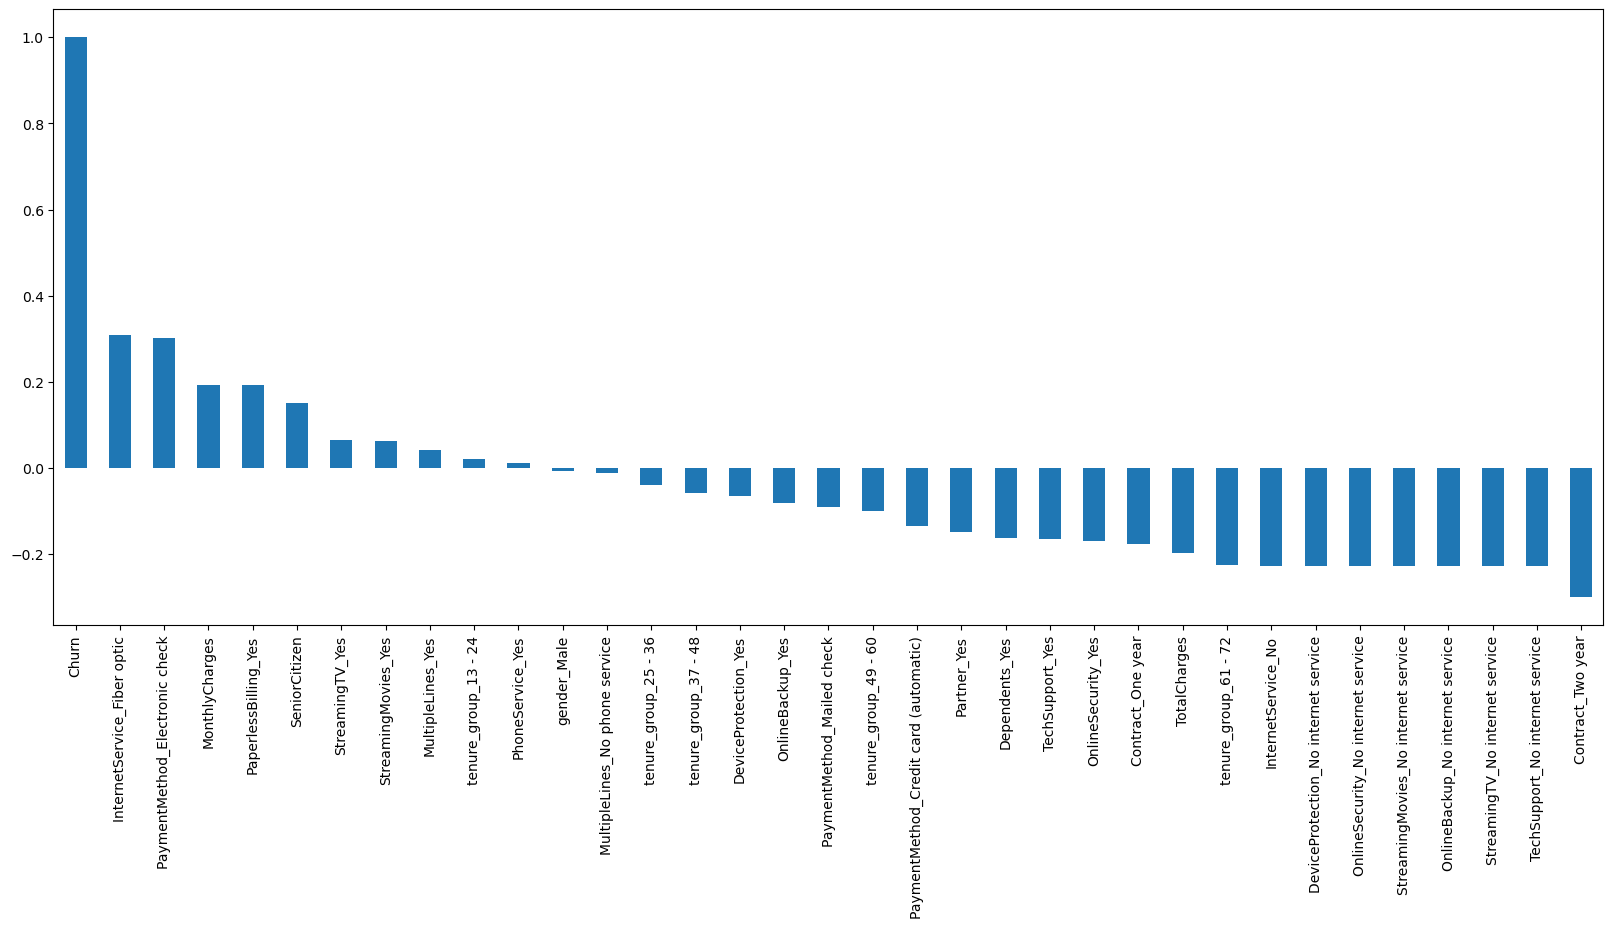

In [28]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Derived Insight: **

**HIGH** Churn seen in case of  **Month to month contracts**, **No online security**, **No Tech support**, **First year of subscription** and **Fibre Optics Internet**

**LOW** Churn is seens in case of **Long term contracts**, **Subscriptions without internet service** and **The customers engaged for 5+ years**

Factors like **Gender**, **Availability of PhoneService** and **# of multiple lines** have alomost **NO** impact on Churn

This is also evident from the **Heatmap** below

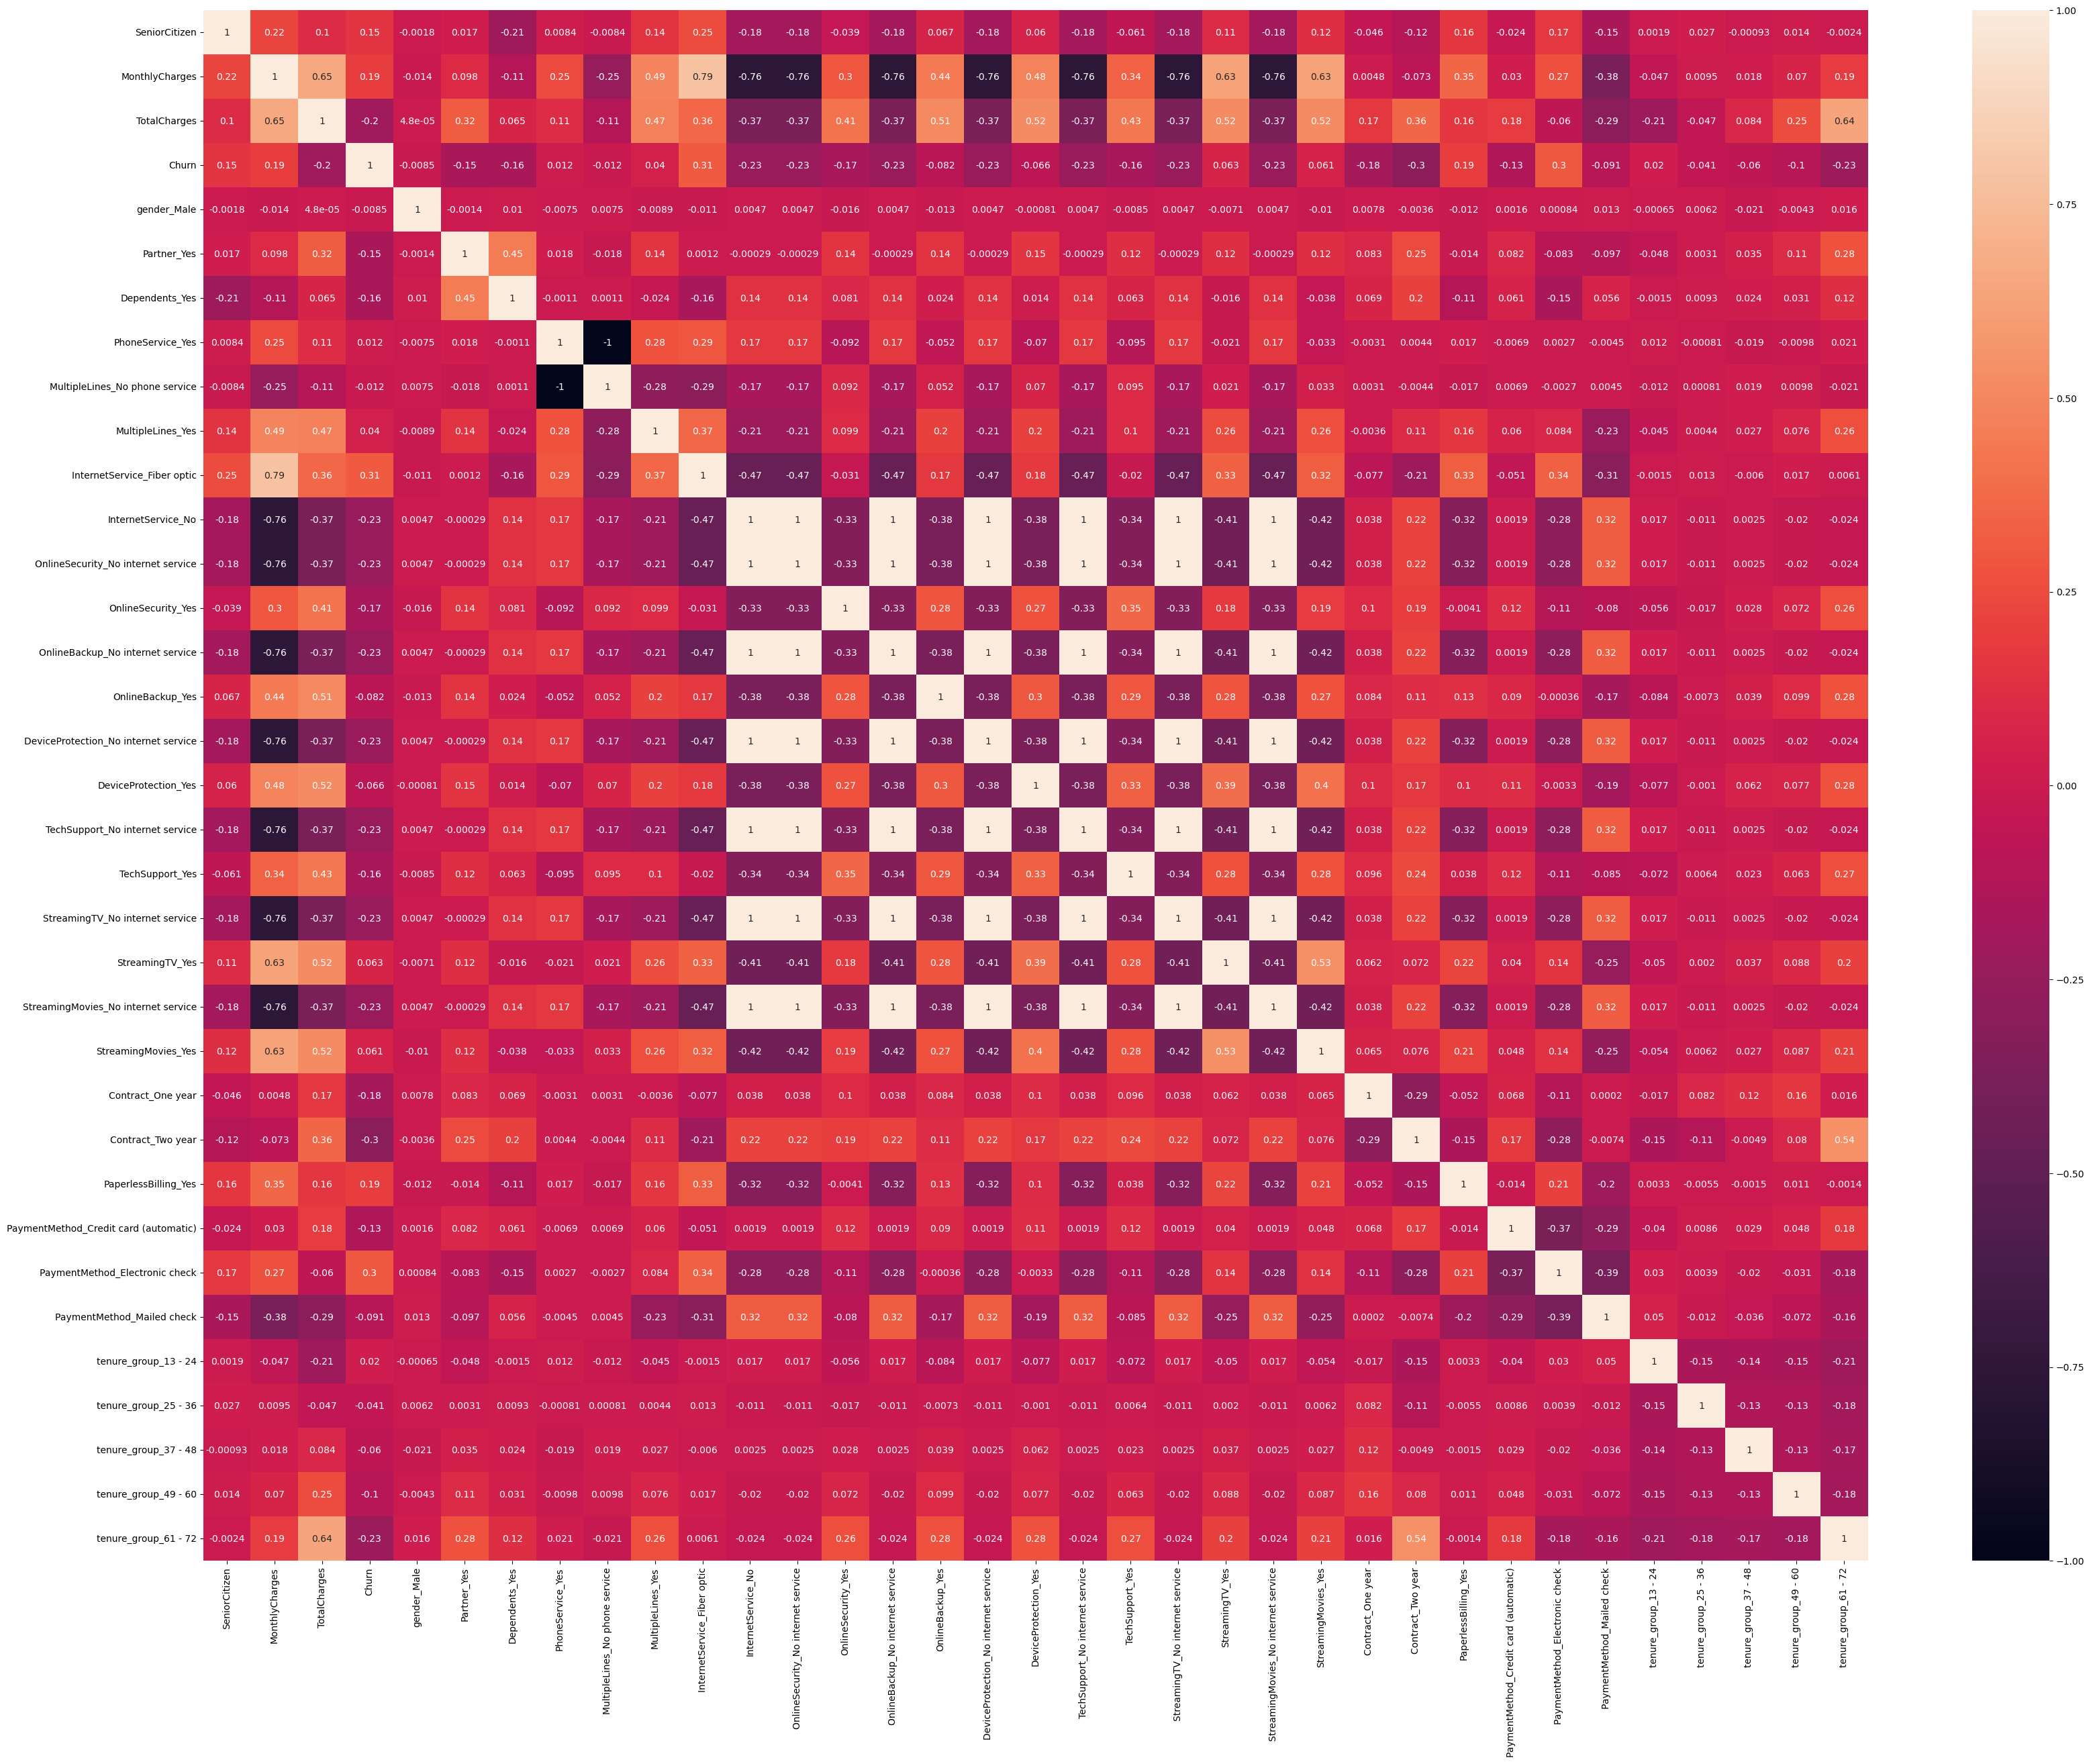

In [29]:
plt.figure(figsize=(40,30))
sns.heatmap(telco_data_dummies.corr(),annot = True)
plt.show()

### Bivariate Analysis

In [30]:
new_df1_target0=telco_data.loc[telco_data["Churn"]==0]
new_df1_target1=telco_data.loc[telco_data["Churn"]==1]

In [31]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

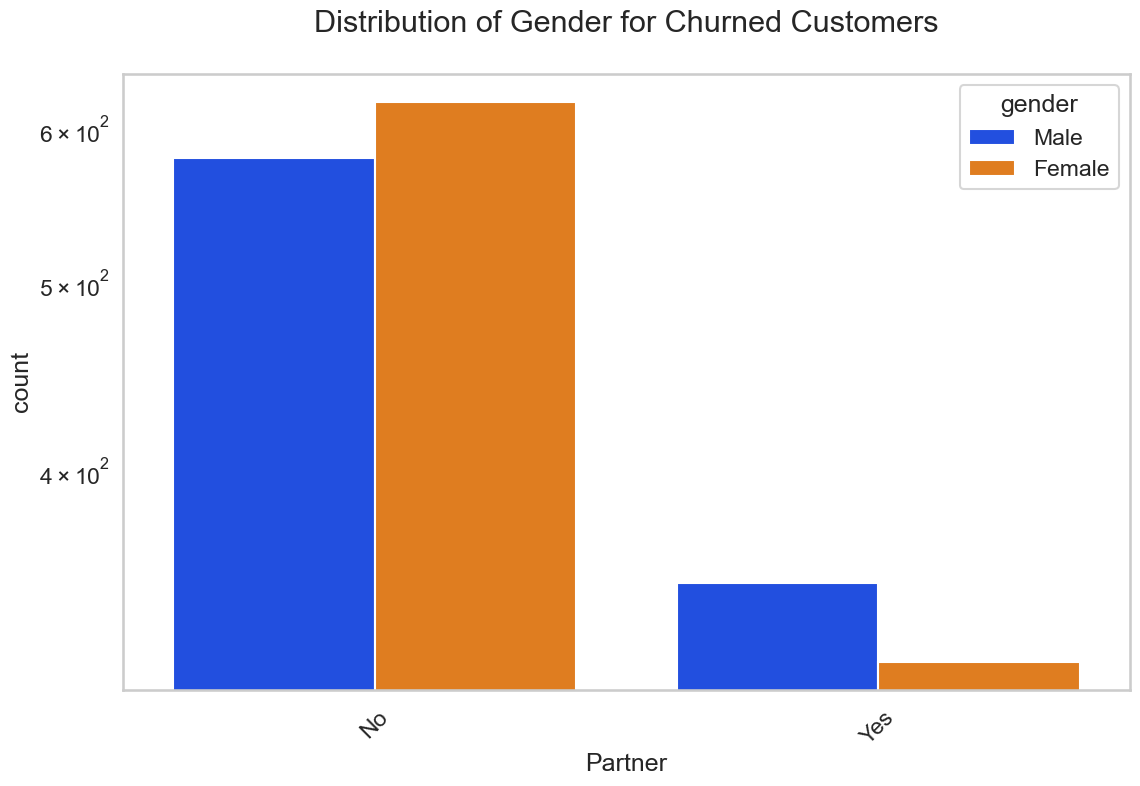

In [32]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

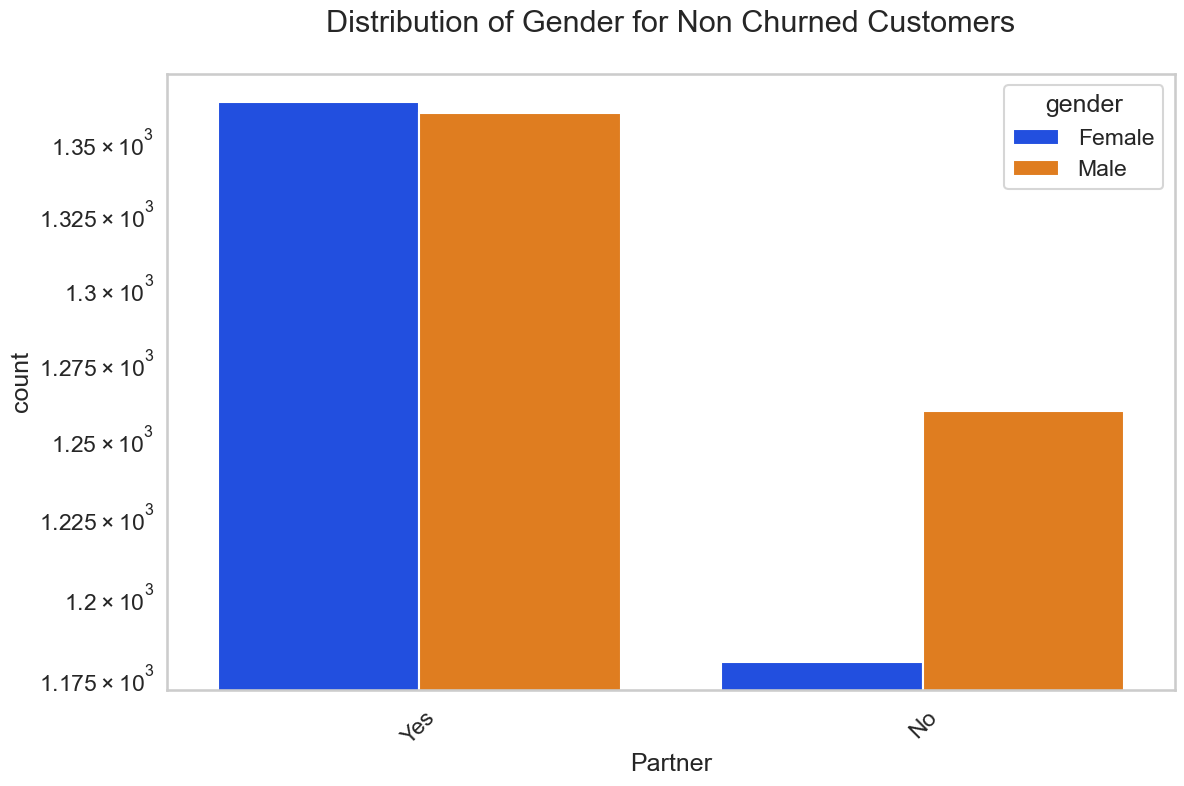

In [33]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

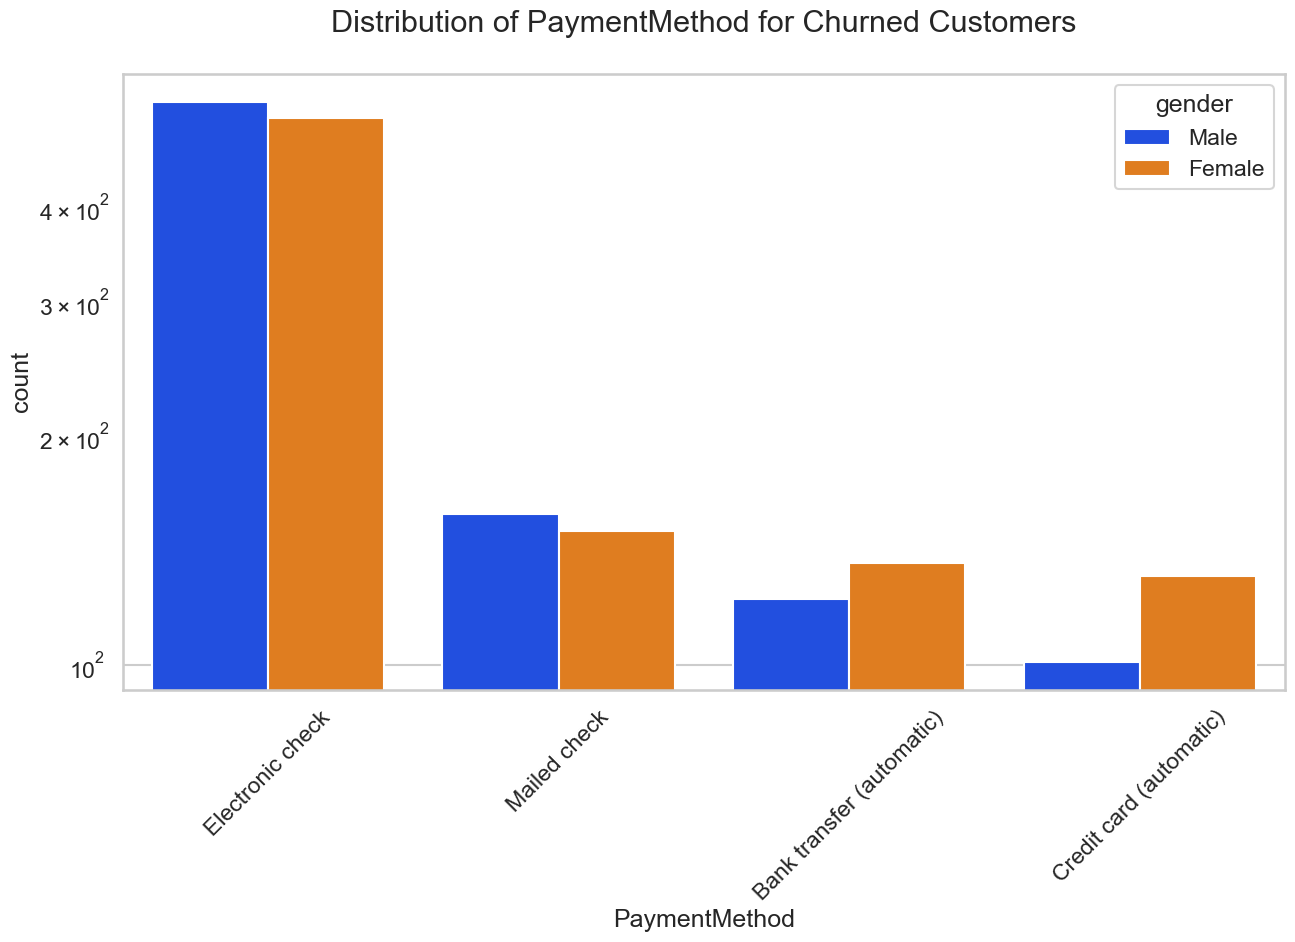

In [34]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

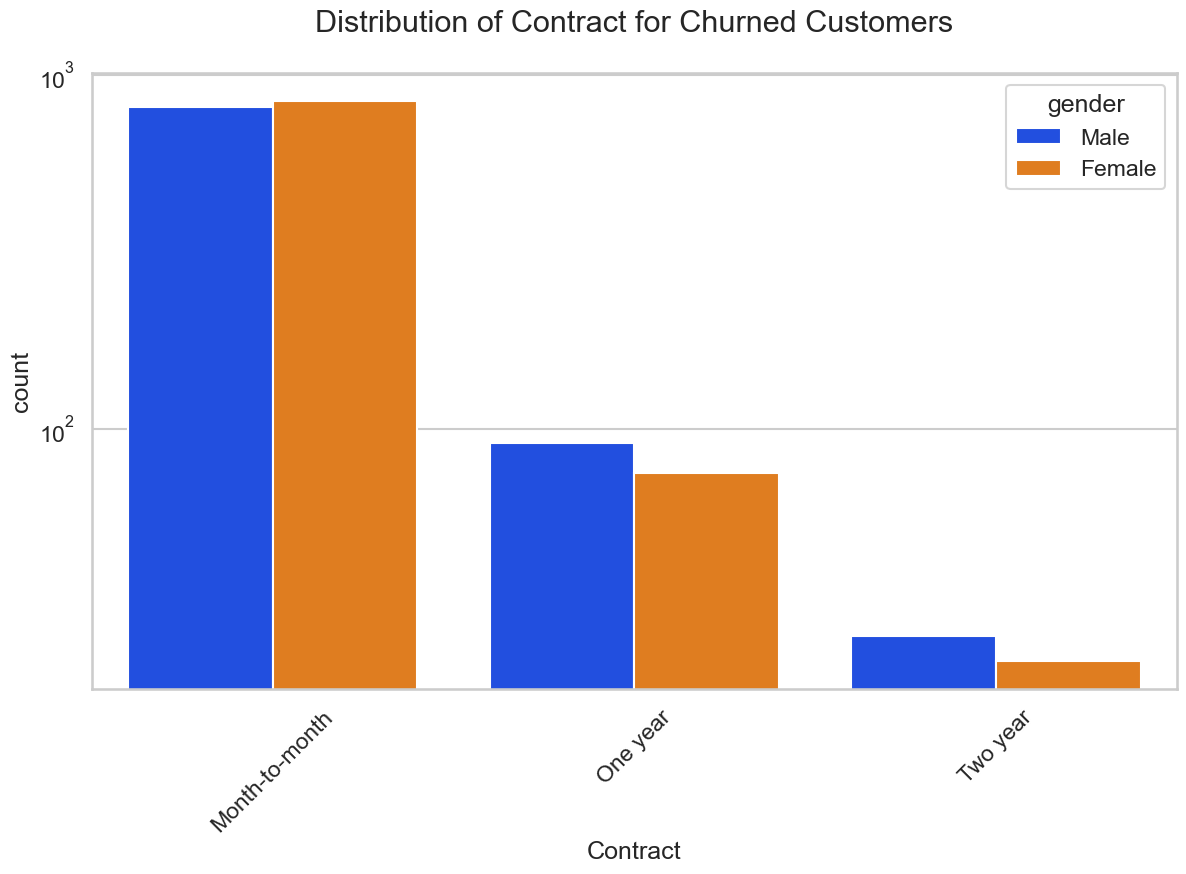

In [35]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

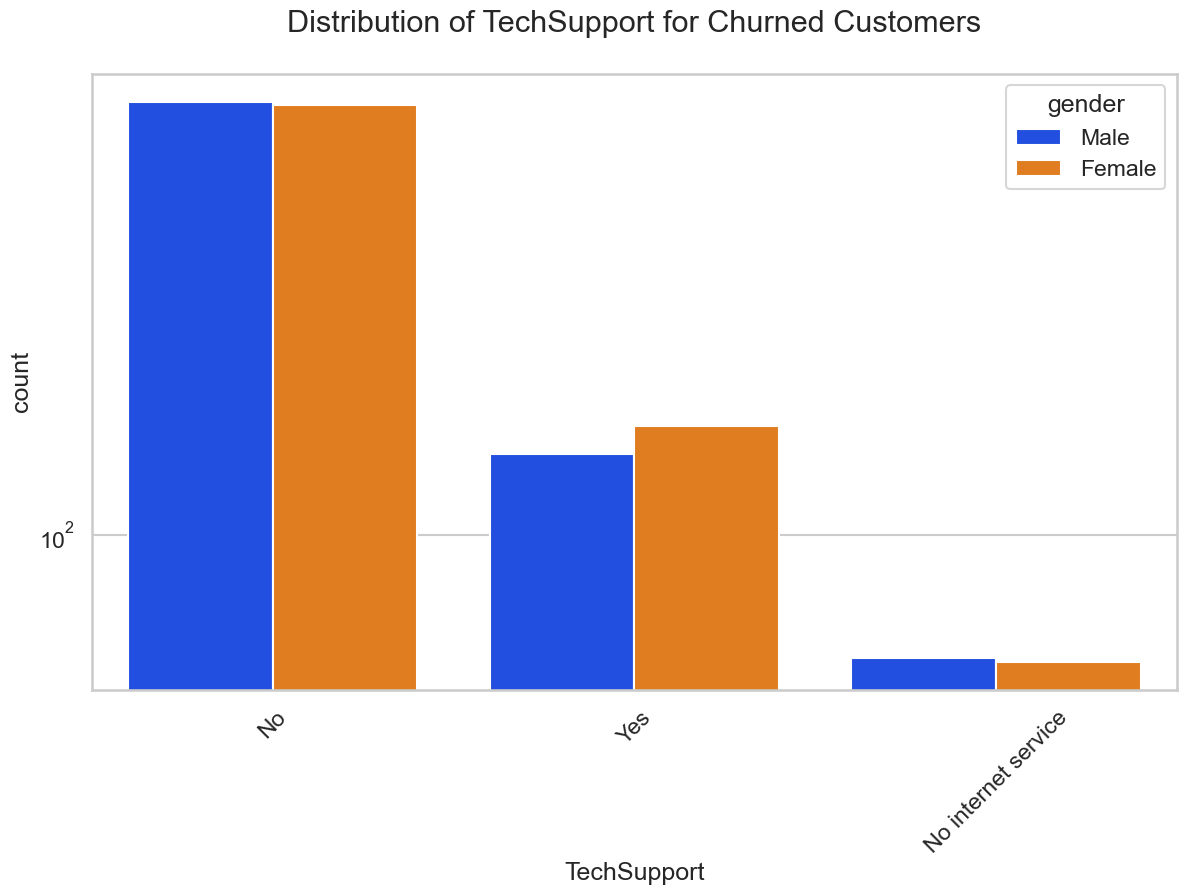

In [36]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

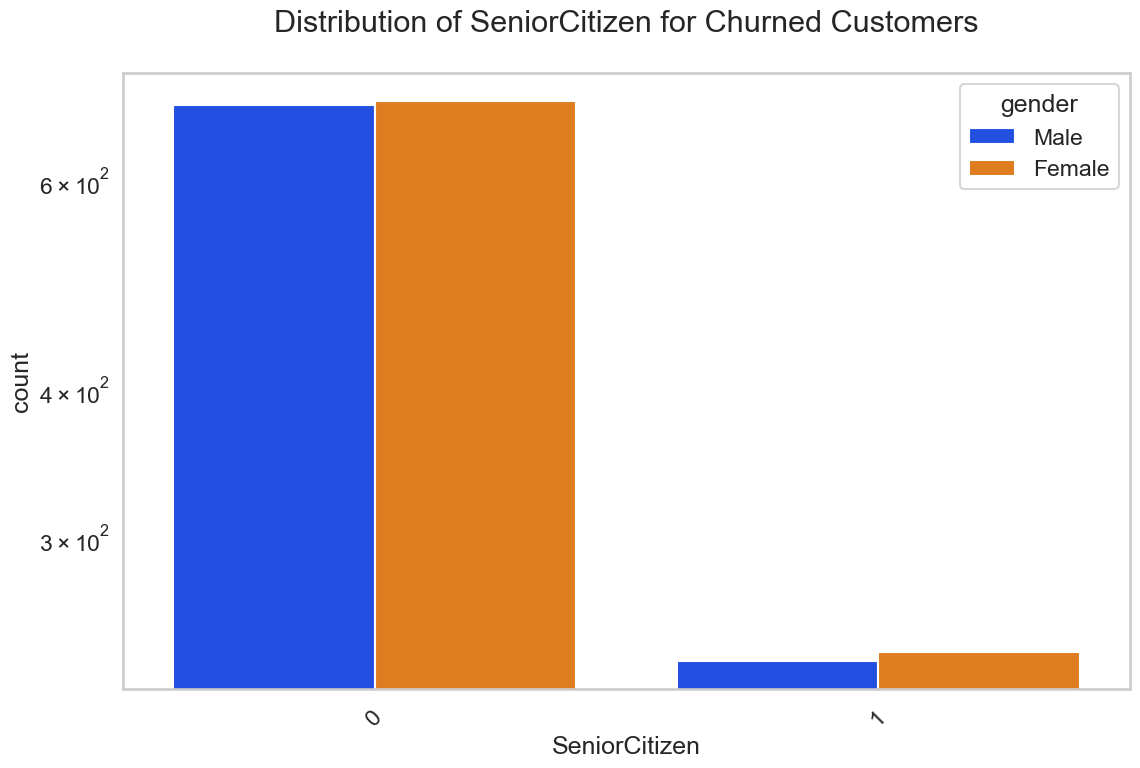

In [37]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

# CONCLUSION

1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners

In [38]:
telco_data_dummies.to_csv('tel_churn.csv')

In [39]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [40]:
#Reading csv
df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
1,1,0,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
2,2,0,53.85,108.15,1,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0


In [41]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [42]:
df=df.drop('Unnamed: 0',axis=1)

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()

df[['MonthlyCharges','TotalCharges']] = scaler.fit_transform(df[['MonthlyCharges','TotalCharges']])

df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0.115423,0.001275,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,0,0.385075,0.215867,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
2,0,0.354229,0.010310,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0,0.239303,0.210241,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0.521891,0.015330,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [45]:
# Creating x variables
x=df.drop('Churn',axis=1)
x.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0.115423,0.001275,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,0,0.385075,0.215867,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
2,0,0.354229,0.010310,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0,0.239303,0.210241,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,0,0.521891,0.015330,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [46]:
# Creating y variables
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
5       1
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      0
18      1
19      0
20      1
21      0
22      1
23      0
24      0
25      0
26      1
27      1
28      0
29      1
30      0
31      0
32      0
33      0
34      0
35      0
36      1
37      0
38      1
39      1
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      1
48      0
49      0
50      0
51      1
52      0
53      1
54      0
55      1
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      1
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      1
81      0
82      1
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      1
96      0
97      1
98      0
99      1


In [47]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [48]:
# To check the shape
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4922, 34), (2110, 34), (4922,), (2110,))

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr = LogisticRegression()

In [51]:
# Training data is used for model building
lr.fit(x_train, y_train)

LogisticRegression()

In [52]:
# Testing data is used for prediction
y_pred_logreg = lr.predict(x_test)

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(y_test, y_pred_logreg)

0.7924170616113744

In [55]:
logistic_confusion_matrix = confusion_matrix(y_test, y_pred_logreg)
logistic_confusion_matrix

array([[1373,  155],
       [ 283,  299]], dtype=int64)

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score

In [57]:
# Function For Logistic Regression Create Summary For Logistic Regression

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', lw=2,linestyle='--')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle=':')
    plt.xlabel('False Positive Rate(1-specificity)')
    plt.ylabel('True Positive Rate (sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def get_summary(y_test, y_pred_logreg):
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred_logreg)
    TP = conf_mat[0,0:1]
    FP = conf_mat[0,1:2]
    FN = conf_mat[1,0:1]
    TN = conf_mat[1,1:2]
    
    accuracy = (TP+TN)/((FN+FP)+(TP+TN))
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall =  TP / (TP + FN)
    fScore = (2 * recall * precision) / (recall + precision)
    auc = roc_auc_score(y_test, y_pred_logreg)

    print("Confusion Matrix:\n",conf_mat)
    print("Accuracy:",accuracy)
    print("Sensitivity :",sensitivity)
    print("Specificity :",specificity)
    print("Precision:",precision)
    print("Recall:",recall)
    print("F-score:",fScore)
    print("AUC:",auc)
    print("ROC curve:")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
    plot_roc_curve(fpr, tpr)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[1373  155]
 [ 283  299]]
Accuracy: [0.79241706]
Sensitivity : [0.82910628]
Specificity : [0.65859031]
Precision: [0.89856021]
Recall: [0.82910628]
F-score: [0.86243719]
AUC: 0.7061529569457188
ROC curve:


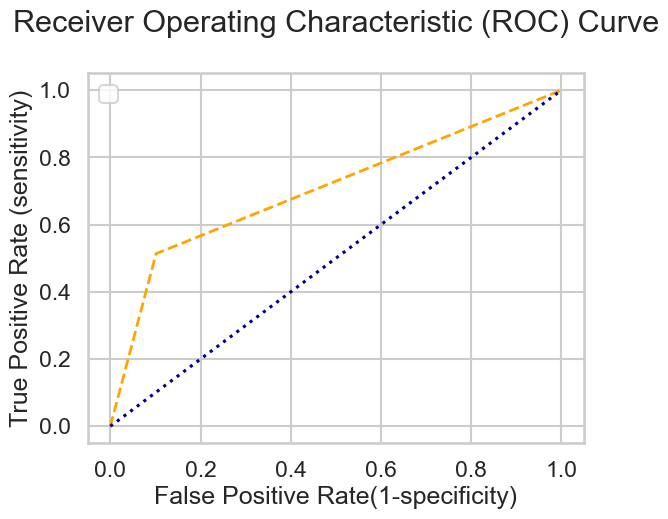

In [58]:
get_summary(y_test, y_pred_logreg)

# Support Vector Machine (SVM)

In [59]:
x_train.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
877,0,0.362189,0.189984,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
5781,0,0.324378,0.232835,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0
6489,0,0.637313,0.007327,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
878,0,0.913930,0.118221,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0
2779,0,0.794527,0.043561,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0


In [60]:
y_train.head()

877     0
5781    0
6489    1
878     1
2779    1
Name: Churn, dtype: int64

In [61]:
from sklearn.svm import SVC

In [62]:
svc = SVC()

In [63]:
svc.fit(x_train, y_train)

SVC()

In [64]:
y_pred_svc = svc.predict(x_test)

In [65]:
accuracy_score(y_test, y_pred_svc)

0.7919431279620853

In [66]:
SVM_confusion_matrix = confusion_matrix(y_test, y_pred_svc)
SVM_confusion_matrix

array([[1382,  146],
       [ 293,  289]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[1382  146]
 [ 293  289]]
Accuracy: [0.79194313]
Sensitivity : [0.82507463]
Specificity : [0.66436782]
Precision: [0.90445026]
Recall: [0.82507463]
F-score: [0.86294099]
AUC: 0.7005069178316331
ROC curve:


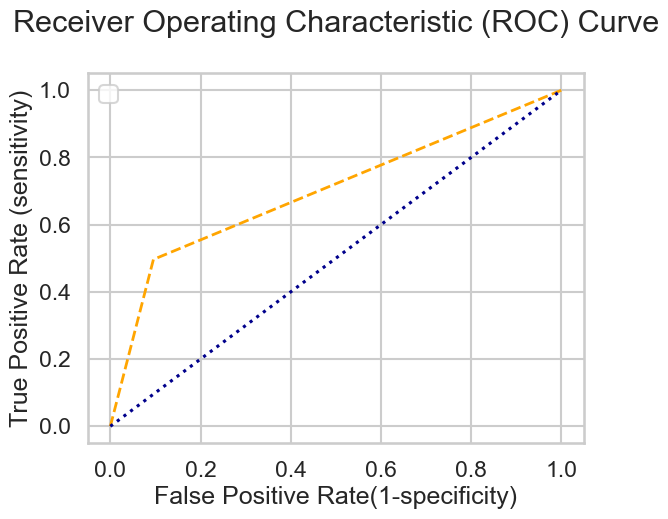

In [67]:
get_summary(y_test, y_pred_svc)

# Naive bayes Classification

In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
gnb = GaussianNB()

In [70]:
gnb.fit(x_train, y_train)

GaussianNB()

In [71]:
y_pred_gnb = gnb.predict(x_test)

In [72]:
accuracy_score(y_test,y_pred_gnb)

0.6592417061611374

In [73]:
gnb_confusion_matrix = confusion_matrix(y_test, y_pred_gnb)
gnb_confusion_matrix

array([[902, 626],
       [ 93, 489]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[902 626]
 [ 93 489]]
Accuracy: [0.65924171]
Sensitivity : [0.90653266]
Specificity : [0.43856502]
Precision: [0.59031414]
Recall: [0.90653266]
F-score: [0.7150218]
AUC: 0.7152601608463325
ROC curve:


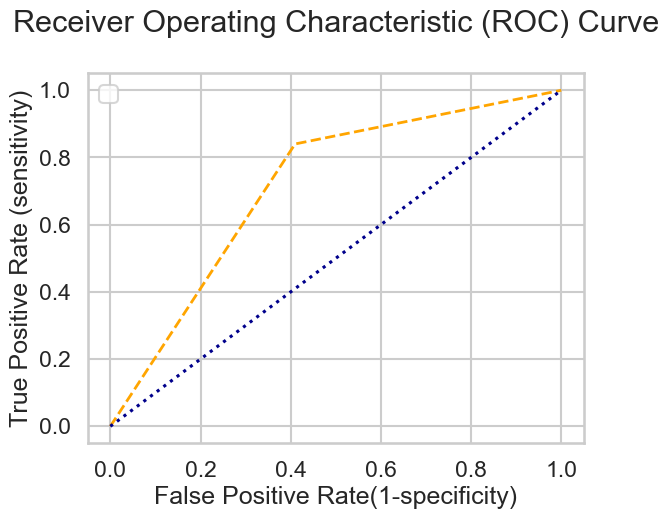

In [74]:
get_summary(y_test, y_pred_gnb)

# K - Nearest Neighbour

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn = KNeighborsClassifier()

In [77]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [78]:
y_pred_knn = knn.predict(x_test)

In [79]:
accuracy_score(y_test, y_pred_knn)

0.7492890995260664

In [80]:
knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)
knn_confusion_matrix

array([[1280,  248],
       [ 281,  301]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[1280  248]
 [ 281  301]]
Accuracy: [0.7492891]
Sensitivity : [0.81998719]
Specificity : [0.54826958]
Precision: [0.83769634]
Recall: [0.81998719]
F-score: [0.82874717]
AUC: 0.6774392328313632
ROC curve:


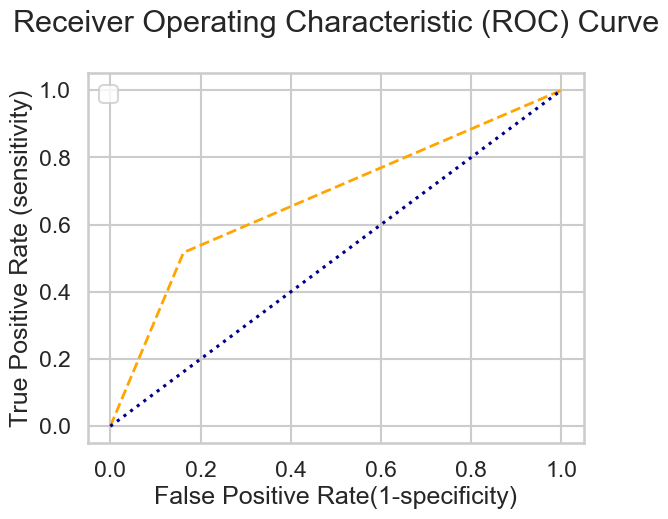

In [81]:
get_summary(y_test, y_pred_knn)

# Decision Tree

In [82]:
dtree = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [83]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [84]:
y_pred_dtree = dtree.predict(x_test)
y_pred_dtree

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [85]:
accuracy_score(y_test, y_pred_dtree)

0.7767772511848341

In [86]:
dtree_confusion_matrix = confusion_matrix(y_test, y_pred_dtree)
dtree_confusion_matrix

array([[1298,  230],
       [ 241,  341]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[1298  230]
 [ 241  341]]
Accuracy: [0.77677725]
Sensitivity : [0.84340481]
Specificity : [0.5971979]
Precision: [0.84947644]
Recall: [0.84340481]
F-score: [0.84642974]
AUC: 0.7176935463557691
ROC curve:


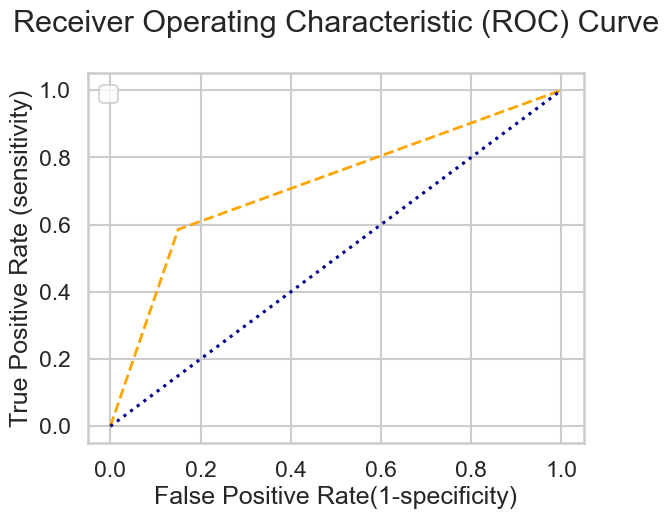

In [87]:
get_summary(y_test, y_pred_dtree)

# Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rfc = RandomForestClassifier()

In [90]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [91]:
y_pred_rfc = rfc.predict(x_test)

In [92]:
accuracy_score(y_test, y_pred_rfc)

0.7772511848341233

In [93]:
RandomForest_confusion_matrix = confusion_matrix(y_test, y_pred_rfc)
RandomForest_confusion_matrix

array([[1358,  170],
       [ 300,  282]], dtype=int64)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Confusion Matrix:
 [[1358  170]
 [ 300  282]]
Accuracy: [0.77725118]
Sensitivity : [0.81905911]
Specificity : [0.62389381]
Precision: [0.88874346]
Recall: [0.81905911]
F-score: [0.8524796]
AUC: 0.6866397689858046
ROC curve:


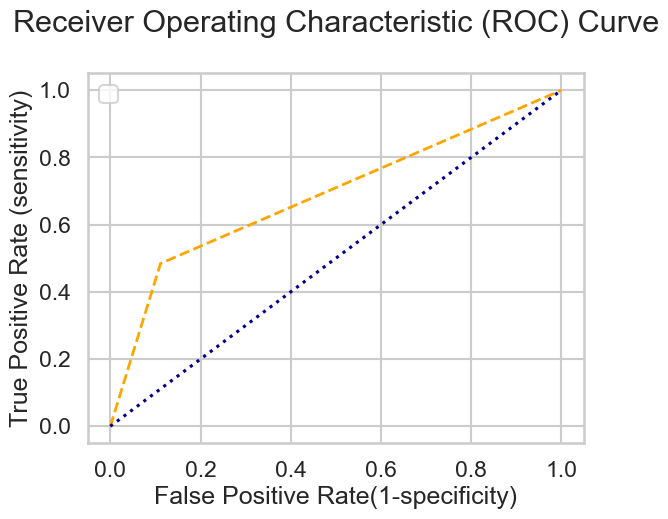

In [94]:
get_summary(y_test, y_pred_rfc)